In [137]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [138]:
# Inspect count and data type of columns
mouse_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [139]:
# Checking the number of mice.
num_mice = mouse_df['Mouse ID'].nunique()
num_mice

249

In [140]:
# Check for duplicate mouse 
duplicate = mouse_df.duplicated().value_counts()
duplicate

False    1892
True        1
dtype: int64

In [141]:
# Extract rows with duplicate mouse information
duplicated = mouse_df[mouse_df.duplicated()]
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [142]:
# Drop duplicate mouse
mouse_df = mouse_df.drop_duplicates(keep='first')

# Confirm duplicate mouse is dropped
duplicates_new = mouse_df.duplicated().value_counts()
duplicates_new

False    1892
dtype: int64

In [143]:
# Re-Inspect data type and count of column values
mouse_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1892 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1892 non-null   object 
 1   Drug Regimen        1892 non-null   object 
 2   Sex                 1892 non-null   object 
 3   Age_months          1892 non-null   int64  
 4   Weight (g)          1892 non-null   int64  
 5   Timepoint           1892 non-null   int64  
 6   Tumor Volume (mm3)  1892 non-null   float64
 7   Metastatic Sites    1892 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.0+ KB


In [144]:
# Summary Statistics


# Mean Tumor Volume
#tumor_volume_mean = mouse_df['Tumor Volume (mm3)'].mean()

# Median Tumor Volume
#tumor_volume_median = mouse_df['Tumor Volume (mm3)'].median()

# 

#tumor_volume_mean, tumor_volume_median

In [145]:
# Create a groupby object of drug regimen
drug_groupby = mouse_df.groupby('Drug Regimen')

# Mean Tumor Volume for each drug regimen
tumor_volume_mean = drug_groupby['Tumor Volume (mm3)'].mean()

# Median Tumor Volume for each drug regimen
tumor_volume_median = drug_groupby['Tumor Volume (mm3)'].median()

# Variance of Tumor Volume for each drug regimen
tumor_volume_variance = drug_groupby['Tumor Volume (mm3)'].var()

# Standard Deviation of Tumor Volume for each drug regimen
tumor_volume_std = drug_groupby['Tumor Volume (mm3)'].std()

# SEM of Tumor Volume for each drug regimen
tumor_volume_sem = drug_groupby['Tumor Volume (mm3)'].sem()

# Generate  summary Statistics Table
summary_statistics = pd.DataFrame({'Mean': tumor_volume_mean,
                                  'Median': tumor_volume_median, 
                                  'Variance': tumor_volume_variance, 
                                  'std': tumor_volume_std, 
                                  'sem': tumor_volume_sem})

summary_statistics

,Mean,Median,Variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


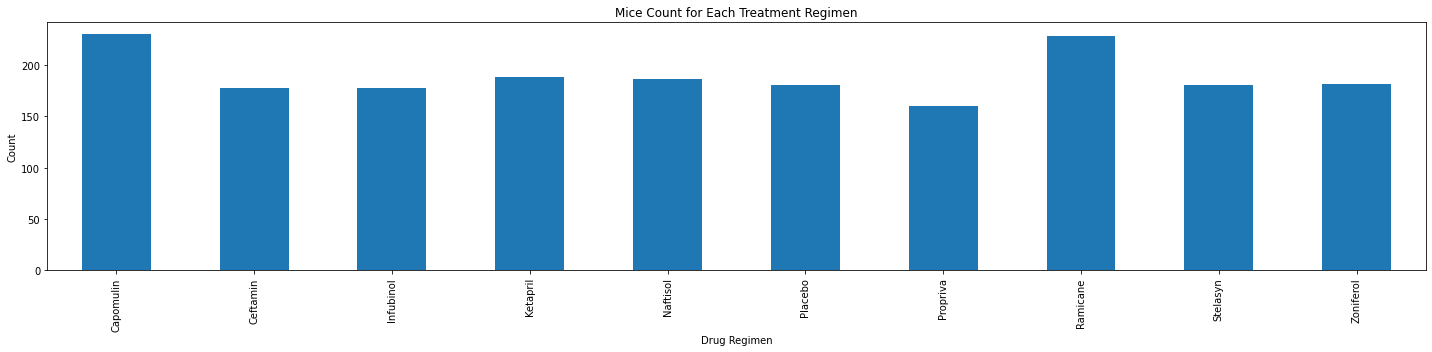

In [146]:
# Bar plot showing count of mice for each treatment regimen
# Calculate Mice count
mouse_count = drug_groupby['Mouse ID'].count()

# Create bar Plot with pandas
mouse_count.plot(kind='bar', figsize=(20, 5))
# Set a title for the chart
plt.ylabel('Count')
plt.title('Mice Count for Each Treatment Regimen')
plt.tight_layout()
plt.show()

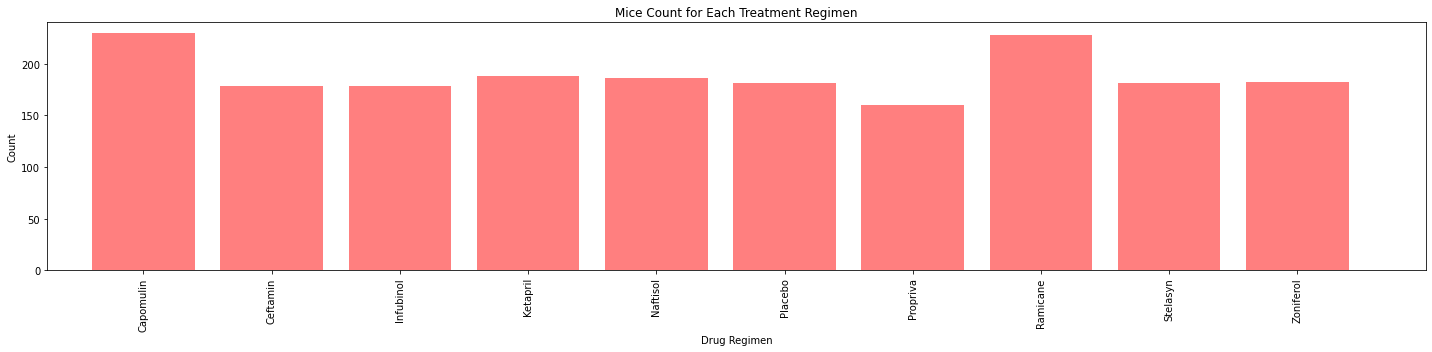

In [147]:
# Create bar plot using matplotlib

# Set x axis and tick locations
x_axis = np.arange(len(mouse_count))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,5))

# Create the plot
plt.bar(x_axis, mouse_count, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, mouse_count.index, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(mouse_count)+10)

# Set a Title and labels
plt.title('Mice Count for Each Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')

# Show the grap
plt.tight_layout()
plt.show()


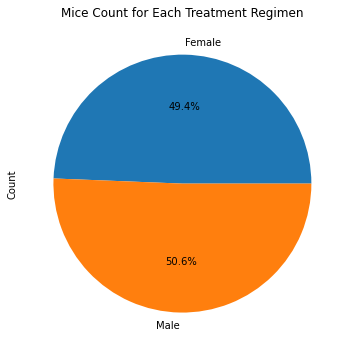

In [154]:
# Count of Mice Gender

# Create a groupby object of gender
mouse_gender = mouse_df.groupby('Sex')

# Count of Sex
mouse_sex_count = mouse_gender['Mouse ID'].count()

# Create Pie Plot using pandas
mouse_sex_count.plot(kind='pie', figsize=(20, 5), autopct='%1.1f%%')

# Set a title for the chart
plt.ylabel('Count')
plt.title('Mice Count for Each Treatment Regimen')
plt.tight_layout()
plt.show()

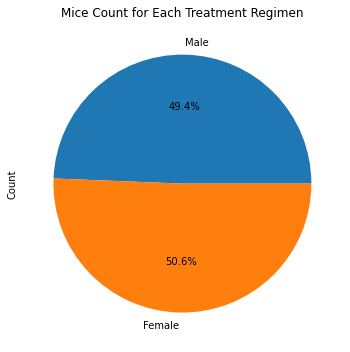

In [163]:
# Create pie plot using matplotlib
plt.figure(figsize=(20, 5))
labels = ['Male', 'Female']
plt.pie(mouse_sex_count, autopct="%1.1f%%", labels=labels)
# Set a title for the chart
plt.ylabel('Count')
plt.title('Mice Count for Each Treatment Regimen')
plt.tight_layout()
plt.show()